<a href="https://colab.research.google.com/github/uprestel/Segmentation/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation Project

In [1]:
#!git clone https://github.com/uprestel/Segmentation
#%cd Segmentation/

In [2]:
#%cd data
#%cd ..
#!ls

In [3]:


#parameters for Pi_k
max_steps_Pi_k = 100 
Pi_k_epsilon = 1e-4
Pi_k_tolerance = 1e-3

#Parameters for Champolle Pock algorithm
chambolle_Pock_epsilon = 1e-3
chambolle_Pock_debug = True
chambolle_Pock_iterations = 35
tau = 1.0/9.0
tau_ = 1.0/9.0



path  /home/user/Documents/Uni/Universität-Heidelberg/Semester-12/Image-Processing/Project/Segmentation


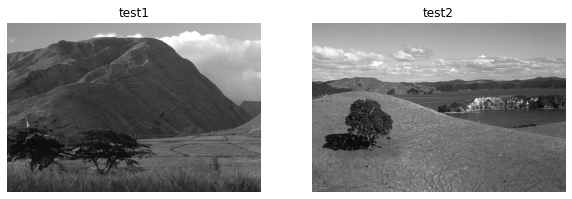

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy.linalg as LA
import multiprocessing
import itertools
from multiprocessing import shared_memory


def load_images_grayscale(paths):
    images = []
    for path in paths:
        img = Image.open(path).convert('L')
        images.append(img)
    return images    

def plot(images, titles, figsize=(10,5)):
    n_images = len(images)
    
    fig = plt.figure(figsize=figsize)
    
    for i in range(n_images):

        ax = fig.add_subplot(1,n_images, i+1)
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
        ax.set_title(titles[i])
        
    plt.show()

print("path ", os.getcwd())


images = load_images_grayscale([
                                "data/28083.jpg",
                                "data/36046.jpg"

])
plot(images, ["test1", "test2"])

In [5]:
def partition(U, v, v_k):
    G = []
    L = []
    for j in U:
        if v[j] >= v_k:
            G.append(j)
        else:
            L.append(j)

    return np.array(G),np.array(L)


def projection_S(v, z):
    """
        Linear time projection algorithm onto the simplex S
    """
    n = v.shape[0]
    U = np.arange(n)
    print(U)
    p = 0
    s = 0

    while U.shape[0] > 0:
        k = np.random.choice(U)
        v_k = v[k]
        
        G,L = partition(U, v, v_k)
        
        delta_p = len(G)
        delta_s = v[G].sum()

        if (s + delta_s) - (p + delta_p)*v_k < z:
            
            s += delta_s
            p += delta_p
            U = L
            
        else:
            
            U = np.setdiff1d(G, k)
            
    theta = (s - z)/p
    w = np.maximum(v - theta, 0)
    return w

#v = np.array([1,2,3,4,5,6,7,8,9,1.1,6.6])
#z = 7
#projection_S(v,z)

In [6]:
def Pi_K(q, K, max_steps = max_steps_Pi_k, tolerance = Pi_k_tolerance): #K = { ( i1, i2, oi1i2)_1, ( i1, i2, oi1i2)_2, .... }
#q input is k x d shape    
    d = 1
    if( isinstance(q[1], list) ):
        d = a.shape[1]
    
    #print("shape q ", q.shape)
    qi1i2 = np.zeros(d)
    
    change = tolerance+1
    
    k = len(K)
    #print("k ", k)
    #print("q shape ", q.shape)
    Qij = np.zeros( (q.shape[0], q.shape[0],q.shape[1]) )
    
    it = 0
    #while( (change > tolerance) and (it < max_steps) ) :
    while( (it < max_steps) and (change > tolerance) ) :
    #while( (change > tolerance) ) :
        
        q_old = q.copy()
        
        
        for i in range(0, k):
            
            i1 = K[i][0]
            i2 = K[i][1]
            o = K[i][2]
            
            qi1i2 = Qij[i1,i2]
            
            q_ = q[i2] - q[i1] + qi1i2
            #print(type(q_))
            
            
            #if( np.isclose(LA.norm(q_), Pi_k_epsilon)):
            if LA.norm(q_) < 1e-10:
                #print("break")
                q = q_old
                change = tolerance 
                step = it
                break
            
            q__ = abs( LA.norm(q_) - o ) * ( q_/LA.norm(q_))
            #print("q ", q)
            #print("q_", q_)
            #print("q__", q__)
            #print("qi1i2", q__)
            q[i1] = q[i1] + 0.5*(q__ - qi1i2)
            q[i2] = q[i2] - 0.5*(q__ - qi1i2)
            qi1i2 = q__
            
            Qij[i1,i2] = qi1i2
            
        it = it +1
        #print("it ", it)
    
        #diff = list(map(abs, (q-q_old) ))
        
        
        
        #change = euclidian_distance(q, q_old)
        change = LA.norm(q-q_old, 2)

        #change = sum(diff)
        #print("change ", change)
        #print("qold ", q_old)
        #print("q ",  q)
        #print("")
        
    
    #if it == max_steps:
    #    print("Equal steps ", q, " change ", change)
    
    #print(step)
    return q
    
    
    

In [7]:
#q = np.array([1.234, 3.413, 89.99, 100.912])
qi = np.array( [[  0. ,0. ,0. ], [499.32543691, 499.93491262, 500.73965047]] ) 
#q = np.transpose(qi)
q = np.array( [ [-1.00134475,  0.06917034], [-0.12199089,  0.5453392 ], 
 [ 0.59937775, -0.54585204], 
 [ 0.9739579,  0.3813425 ]])
              
#print("q shape ", q.shape)
#K = [ [0, 1, 1.45356], [2, 3, 0.223215] ]
#K = [ [0, 1, 1.45356], [2, 3, 0.223215] ]
#K = [ [0, 1, 0.45356], [1, 2, 2.223215], [0, 2, 1.623215] ]
K = [ [0,1,np.sqrt(1)], [0,2,np.sqrt(2)], [0,3,np.sqrt(3)], [1,2,np.sqrt(abs(1-2))], [1,3,np.sqrt(abs(1-3))], [2,3,np.sqrt(abs(2-3))] ] 
              
re = Pi_K(q, K, 1000, 0.0000001)

KA = np.zeros((4,4))
for e in K:
    KA[e[0], e[1]] = e[2]

#print( re )
#print(type(re))
#print(" |0-1| ", LA.norm( re[0, :] - re[1,:] ))
#print(" |0-2| ", LA.norm( re[0, :] - re[2,:] ))
#print(" |1-2| ", LA.norm( re[1, :] - re[2,:] ))
for i in range(0,4):
    for j in range(i+1, 4):
        print( "i ", i, " j ", j, " ", LA.norm(re[i,:] - re[j,:]), " norm ", KA[i,j] )


i  0  j  1   1.0000000340269217  norm  1.0
i  0  j  2   1.4142135822340698  norm  1.4142135623730951
i  0  j  3   1.661569298168392  norm  1.7320508075688772
i  1  j  2   0.9999999976296096  norm  1.0
i  1  j  3   0.7345630431436865  norm  1.4142135623730951
i  2  j  3   0.8502500523450309  norm  1.0


In [8]:
import random

def listN(n):
    
    return [ i  for i in range(0, n)]

def randomElement(U): 
    n = len(U)
    i = random.randrange(0,n)

    return U[i]
    
    
def getGL(U, v, k):
    
    G = []
    L = []
    
    for i in U:
        
        if i >= k:
            G.append(i)
        else:
            L.append(i)
            
    return (G, L)
    
#max || w - v||^2_2, s.t. ||w||_1 <= z    
def Pi_s(vi, z):
    """
        Linear time O(n) projection algorithm onto simplex S
    """
    
    v = vi.copy()
    
    U = listN(len(v))
    p = 0
    s = 0
    
    while len(U) > 0:
    
        k = randomElement(U)
        vk = v[k]
        #print("k ", k)
        #print("vk ", vk)
    
        (G, L) = getGL(U, v, k)
    
        delta_p = len(G)
        delta_s = 0
        for i in G:
            delta_s = delta_s + v[i]
        
        #print("delta_p ", delta_p)
        #print("delta_s ", delta_s)
        #print("G ", G)
        #print("L ", L)
        #print("U ", U)
        
        if( ((s+delta_s) - (p+delta_p)*vk) < z  ):
            s = s + delta_s
            p = p + delta_p
            U = L
        else:
            G.remove(k)
            U = G
            
        
        #print("U ", U)
        #print("s ", s)
        #print("p ", p)
        #print("---------------------------------------------------------------------------")
    
    theta = (s - z)/p
    
    for i, val in enumerate(v):
        v[i] =  max(val - theta, 0.0) 
        
    return v
        
    
def Pi_S(v, z): # max || w - v||^2_2, s.t. sum(w_i) = 1, projection onto the simplex
    """
        Less efficient projection algorithm (of order O(n log n)) onto
        the simplex S
    """
    mu0 = np.sort(v)
    mu = np.flip(mu0)
    #print("mu ", mu)
    
    n = len(v)
    #print("n ", n)
    
    P = np.zeros(n)
    
    mu_z = mu - z
    #print("mu_z ", mu_z)
    p = 0
    for j in range(1,n+1):
        
        #s = np.sum ( mu_z[:(j+1)]  )
        s = np.sum ( mu[:(j)]  ) - z
        #for i in range(0, j+1):
        #    s = s + mu[i] - z
        #print("s ", s, " j ", j)
        
        val = mu[j-1] - 1.0/(j)* (s) 
        #print("val ", val, " division ", 1.0/(j+1))
        #P[j-1] = max(val, 0)
        if val > 0:
            p += 1
        
        
    #print("p ", p)
    #p = np.argmin(P)
    
    theta = 1.0/(p) * (np.sum(mu[:(p)])-z)
    
    #print("mu ", mu[:(p)])
    #print("theta ", theta)
    
    #res = np.array( [ max(vi - theta, 0.0 ) for vi in v ] )
    res = np.zeros(n)
    for i in range(0,n):
        if v[i]-theta > 0:
            res[i] = v[i]-theta
    
    #print("res ", res)    
    return res    
    
def gradient_vh(i,j, img, N, h):
    
    l = len(img[0][0])
    
    if ( 0 <= i and 0 <= j and i < (N-1) and j < (N-1) ):
        return np.array([ (img[i+1][j] - img[i][j])/h, (img[i][j+1] - img[i][j])/h ] )
    elif ( 0 <= i and i < (N-1) and j == (N-1)):
        return np.array([ (img[i+1][j] - img[i][j])/h, np.zeros(l) ] )
    elif ( 0 <= j and j < (N-1) and i == (N-1)):
        return np.array([np.zeros(l), (img[i][j+1] - img[i][j])/h] )
    
    return np.array([np.zeros(l), np.zeros(l)])

def computeGradient(img, h): #img = (N,M,K)
    
    
    #def grad(a, b, h): # a = img[i+1][j], b = img[i,j]
    #    return np.array( (a - b)/h
                        
    #K = (len(img.shape) > 2)?img_shape[2]:1
    K = 1
    if len(img.shape) > 2:
        K = img.shape[2]
                        
                        
    D_shape = (img.shape[0]+2, img.shape[1]+2,K)
    
    D = np.zeros(D_shape)                                       
    D[1:-1, 1:-1] = img[:,:]
                
    Di = D[2:, 1:-1]
    Di_ = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    Di_[0:-1, :, :] = img[:-1, :, :]
    
    #print("Di ", Di)
    #print("Di_ ", Di_)
    
    Dj = D[1:-1, 2:]
    Dj_ = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    Dj_[:, 0:-1, :] = img[:, :-1,:]
    vi = (Di-Di_)/h 
    vj = (Dj-Dj_)/h 
    #vj0 = (np.transpose(img)-np.transpose(Dj))/h  
    
    #print("vi ", vi)
    #print("vj ", vj)

    
    #print("vi shape ", vi.shape)
    #print("vj shape ", vj.shape)
    #print("stack shape ", np.stack( (vi, vj), 2 ).shape )
    return np.stack( (vi, vj), 2 )
    

#Computes Divergernce, assumes h = 1
def div(E, N):
    
    S = E.shape
    D = E.copy()
    
    #with np.nditer( [a,b], flags=["reduce_ok"], op_flags=[''])
    for j in range(0, E.shape[1]):
        D[0,j,0]  = E[0,j,0]
        for i in range(1, E.shape[0]-1):
            D[i,j,0]  = E[i,j,0] - E[i+1,j,0]
        D[E.shape[0]-1,j,0]  = -E[E.shape[0]-2,j,0]
        
    for i in range(0, E.shape[0]):
        D[i,0,1]  = E[i,0,1]
        for j in range(1, E.shape[1]-1):
            D[i,j,0]  = E[i,j,0] - E[i,j+1,0]
            
        D[i,E.shape[1]-1,0]  = -E[i,E.shape[1]-2,0]
    
    
    Dr = np.add.reduce(D, 2)
    return Dr
    

In [9]:
Pi_S( [1.2, 3.4, 6.8, -1], 1)

array([0., 0., 1., 0.])

In [10]:
def load_images(paths):
    images = []
    for path in paths:
        img = Image.open(path)
        images.append(img)
    return images   

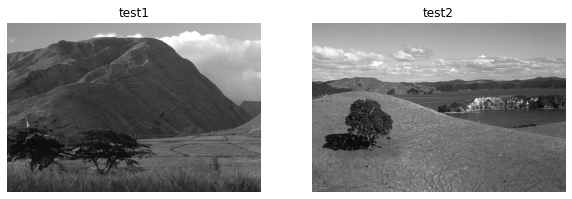

In [11]:
plot(images, ["test1", "test2"])

In [12]:
print(images[0].getbands())
print(images[0].size)
(N,M) = images[0].size
print(N,M)

('L',)
(481, 321)
481 321


In [13]:
#pic = images[0].resize( (400, 400) )
pic = images[0]
#img = np.array(pic.getdata()).reshape(pic.size[1], pic.size[0],1)
#img0 = np.array(pic)
#img = np.zeros( (img0.shape[0],img0.shape[1],1) )

imgs = []
for I in images:
    img0 = np.array(I)
    img = np.zeros( (img0.shape[0],img0.shape[1],1) )

    for i in range(0, img0.shape[0]):
        for j in range(0, img0.shape[1]):
            img[i,j] = np.array([img0[i,j]])
            
    imgs.append(img)



In [14]:
img.shape
print("max ", np.amax(img))

max  251.0


In [15]:
def loop_outer(Gradient, D, Ei, V, Vbar, G, K): #dependent on (i,j)
    
        Vs = np.sort(V)
        Z = np.zeros(V.shape)
        Z[-1] = 1.0
        
        
        if np.isclose(Vs,Z,atol=1e-6).all(): #check if V has only one 1 and other values are zero
            return (Ei, V, Vbar)
    
        
        #K = []
        #K.append( (0, 1, np.sqrt(abs(1-0)) )) # select o = sqrt( . )
        #K.append( (1, 2, np.sqrt(abs(2-1)) ))
        #K.append( (0, 2, np.sqrt(abs(2-0)) ))
    
        #helper0 = Ei[i,j] + tau_*gradient_vh(i, j, Vbar, N, h) # E 
        helper0 = Ei + tau_*Gradient
        #print("helper0 ", helper0, " shape ", helper0.shape)
        helper0_T = np.transpose(helper0) #Pi_k expectes k x d
        #print("helper0_T ",  helper0_T, " shape ", helper0_T.shape)
            
        Ei = np.transpose( Pi_K( helper0_T, K) )  
                
        helper1 = V + tau*( D - G) 
        Vnext = Pi_S(helper1, 1) # S = { sum_{i = 1}^k (z_i) = 1}
        
        Vbar = 2*Vnext - V
        V = Vnext
                
        #if (i,j) == (10,10):
        #    print("helper0 ", helper0)
        #    print("helper0_T ", helper0_T)
        #    print("helper1 ", helper1)
        #    print("Ei ", Ei[i,j])
        #    print("V ", V[i,j])
        #    print("Vbar ", Vbar[i,j])
        #    print("G ", G[i,j])

        return (Ei, V, Vbar)

        
        
def Chambolle_Pock_parallel(img, c):

    # Xi[i,j] = Pi_K(Xi[i,j] + tau2 * grad(vbar_h)[i,j])
    # V[i,j] = Pi_S(V[i,j] + tau2 * div(Xi)[i,j] - G_h[i,j])
    # V_bar = 2*V - V_old 
    
    
    
    h = 1
    k = len(c) # 3 classes
    
    #c = (0, 120, 255) #colors to find
    #f = lambda  x : np.array( [ (x[0]-c[0])**2, (x[0]-c[1])**2, (x[0]-c[2])**2 ])
    
    f = lambda x : np.array( [ (x[0]-c[i])**2 for i in range(0,len(c)) ] )
    
    
    
    G = np.zeros( (img.shape[0], img.shape[1], k) )
    shape_G = G.shape 
    #set G
    for i in range(0, shape_G[0]):
        for j in range(0, shape_G[1]):
            G[i,j] = f(img[i,j])
    
    
    
    shape_Ei =  (shape_G[0], shape_G[1], 2, k) 
    
    Ei = np.zeros(shape_Ei)
    V = np.zeros(shape_G)
    Vbar = np.zeros(shape_G)
    
    
    N = img.shape[0]
    M = img.shape[1]    
    
    K = []
    
    #K.append( (0, 1, np.sqrt(abs(1-0)) )) # select o = sqrt( . )
    #K.append( (1, 2, np.sqrt(abs(2-1)) ))
    #K.append( (0, 2, np.sqrt(abs(2-0)) ))
    Ks = set()
    for i in range(0, k):
        for j in range(i,k):
            Ks.add( (i, j, np.sqrt(abs(j-i)) ) )

    K = list(Ks)
    
    
    K_array = [K]*V.shape[0] * V.shape[1]
    #still too slow
    for step in range(0, chambolle_Pock_iterations):
        
        D = div(Ei, N)
        #print(D.shape)
        Gradient = computeGradient(Vbar, h)
        
        Dflat = D.reshape(D.shape[0] * D.shape[1], D.shape[2]  )
        Gradientflat = Gradient.reshape(Gradient.shape[0] * Gradient.shape[1], Gradient.shape[2], Gradient.shape[3]  )
        
        Eiflat = Ei.reshape(Ei.shape[0] * Ei.shape[1], Ei.shape[2], Ei.shape[3]  )
        Vflat = V.reshape(V.shape[0] * V.shape[1], V.shape[2] )
        Vbarflat = Vbar.reshape(Vbar.shape[0] * Vbar.shape[1], Vbar.shape[2] )
        Gflat = G.reshape(G.shape[0] * G.shape[1], G.shape[2] )
        
        
        #print("Gradient ", Gradient.shape, " ", Gradientflat.shape)
        #print("D ", D.shape, " ", Dflat.shape)
        #print("V ", V.shape, " ", Vflat.shape)
        #print("Vbar ", Vbar.shape, " ", Vbarflat.shape)
        #print("G ", G.shape, " ", Gflat.shape)
        
        Z = zip(Gradientflat, Dflat, Eiflat, Vflat, Vbarflat, Gflat, K_array)
        
        #V0 = np.arange(0,V.size)
        #V0 = V0.reshape(V.shape)
        #Vflat = V0.reshape(V.shape[0] * V.shape[1], V.shape[2] )        
        
        with multiprocessing.Pool(8) as pool:         
            #itertools.product()
            #pool.starmap(loop_outer, itertools.product(aN, aM)  )
            R = pool.starmap(loop_outer, zip(Gradientflat, Dflat, Eiflat, Vflat, Vbarflat, Gflat, K_array)  )
            #R = pool.starmap(FF2, zip(Gradientflat, Dflat, Eiflat, Vflat, Vbarflat, Gflat)  )
            #print(len(R))
            #print("step ", step)
            
            [Ef, Vf, Vbarf] = zip(*R)
            
            
            #print(type(Vf))
            #print(Vf[0], Vf[1], Vf[2])
            #print(np.asarray(Vf))
            #E0 = np.ndarray(shape=Ei.shape, buffer=Ef)
            
            Ei_tmp = np.asarray(Ef).reshape(Ei.shape)
            V_tmp = np.asarray(Vf).reshape(V.shape)
            Vbar_tmp = np.asarray(Vbarf).reshape(Vbar.shape)
            
            #print("type ", type(Ei_tmp))
            #print("E0 ", Ei_tmp.shape)
            
            #Ei = np.copy(Ei_tmp)
            #V = np.copy(V_tmp)
            #Vbar = np.copy(Vbar_tmp)
            
            Ei = Ei_tmp
            V = V_tmp
            Vbar = Vbar_tmp
            
            #print(V)
            
        
        
        #print("end multi ")
        #print("value ", V[50,20], " V0 ", V0[50, 20])
        print("champolle pock parallel step ", step)
    
    #print("value ", V[10,10])
    
    Vr = V.copy()
    
    counter = 0
    imgres = np.zeros((img.shape[0],img.shape[1]))
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            
            imgres[i,j] = 0.0
            #for l in range(0, k):
            #    imgres[i,j] += np.uint8(Vr[i,j,l]*c[l])
            
            l = np.argmax(Vr[i,j])
            imgres[i,j] = np.uint8( Vr[i,j,l]*c[l] )
            
            
            notZero = False
            for l in range(0, k):
                if Vr[i,j,l] > chambolle_Pock_epsilon and Vr[i,j,l] < (1.0-chambolle_Pock_epsilon):
                    notZero = True
                    
            if notZero and chambolle_Pock_debug:
                print("Warning array not 1 ", i ,j, " Value ", Vr[i,j], " counter ", counter )
                counter = counter + 1
    
    return (V,imgres)
        

In [ ]:
print("Chambolle_Pock_parallel")
#(V, I) = Chambolle_Pock_parallel(img)
#(V, I) = Chambolle_Pock_parallel(img, (0, 120, 180, 255)) #does not converge for some pixels

Im = imgs[0]
(V, I) = Chambolle_Pock_parallel(Im, (0, 90, 180, 255))

Chambolle_Pock_parallel


In [ ]:
#Im = Image.fromarray( np.uint8(I) )
#print("size ", I.shape)
ImR = Image.fromarray(I)
plot([ImR, Im],["Result", "Original"])